In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
# Assuming your dataset is in a CSV file named 'customer_data.csv'
df = pd.read_csv('RelianceRetailVisits.csv')


In [36]:
# Example: Encoding categorical variables
label_encoder = LabelEncoder()
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['Visit Status'] = label_encoder.fit_transform(df['Visit Status'])

# Example: Encoding 'Visit Frequency' column
df['Visit Frequency'] = label_encoder.fit_transform(df['Visit Frequency'])

# Example: Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Visit Frequency']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [37]:
# Example: Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age Group', 'Visit Status', 'Visit Frequency']])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


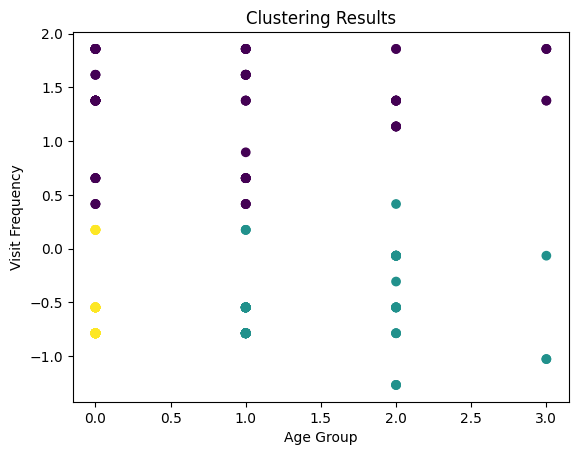

In [39]:
import matplotlib.pyplot as plt

# Example: Visualizing clusters
plt.scatter(df['Age Group'], df['Visit Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age Group')
plt.ylabel('Visit Frequency')
plt.title('Clustering Results')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


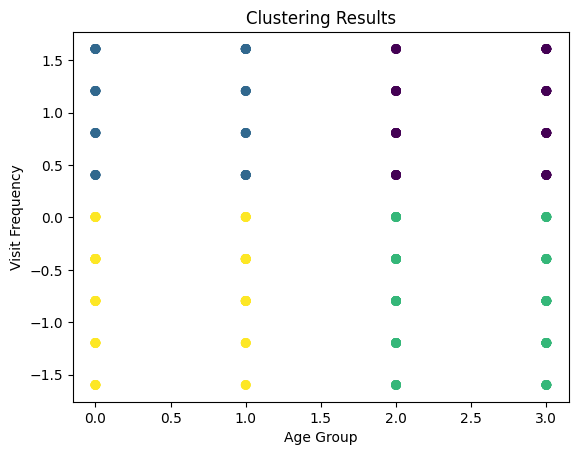

Cluster Counts:
Cluster
2    95
3    82
0    63
1    60
Name: count, dtype: int64

Cluster Means:
         Age Group  Visit Status  Visit Frequency  Other Reliance Stores
Cluster                                                                 
0         2.523810      0.539683         0.984965               0.444444
1         0.500000      0.516667         1.100739               0.550000
2         2.505263      0.515789        -0.779292               0.526316
3         0.463415      0.597561        -0.659323               0.487805


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generating synthetic data for demonstration
np.random.seed(42)

# Age distribution
age_groups = np.random.choice(['16 To 25 years', '26 To 35 years', '36 To 45 years', '46 To 60 years'], size=300)

# Visit status distribution
visit_status = np.random.choice(['Already Visited', 'First visit'], size=300)

# Visit frequency distribution
visit_frequency = np.random.choice(['Once a Month', 'Once every 1-2 weeks', 'Once in 1-2 weeks', 'Once every 3 months', 'Once a week', 'Once every 6 months', 'Once a year or less often', 'Daily', 'Every 2-3 days'], size=300)

# Other Reliance Stores distribution
other_stores = np.random.choice(['Yes', 'No'], size=300)

# Creating DataFrame
df = pd.DataFrame({
    'Age Group': age_groups,
    'Visit Status': visit_status,
    'Visit Frequency': visit_frequency,
    'Other Reliance Stores': other_stores
})

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['Visit Status'] = label_encoder.fit_transform(df['Visit Status'])
df['Visit Frequency'] = label_encoder.fit_transform(df['Visit Frequency'])
df['Other Reliance Stores'] = label_encoder.fit_transform(df['Other Reliance Stores'])

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Visit Frequency']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Applying K-Means clustering with 4 clusters (matching the age groups)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age Group', 'Visit Status', 'Visit Frequency', 'Other Reliance Stores']])

# Visualizing clusters
plt.scatter(df['Age Group'], df['Visit Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age Group')
plt.ylabel('Visit Frequency')
plt.title('Clustering Results')
plt.show()

# Discussing the results
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Analyzing cluster characteristics
cluster_means = df.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)
